<a href="https://colab.research.google.com/github/Felipedeor/AD4-Audiovisual/blob/main/AD4_Audiovisual_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Realizando a consulta no BigQuery

query_extracao = pd.read_csv('/content/bq-results-20240226-133932-1708954982880.csv')


In [ ]:
#Transformando a consulta em um dataframe do Pandas
df = query_extracao

In [ ]:
#Convertendo o campo de data para o formato adequado
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

#Filtrando pelo mês de janeiro de 2024
df = df[(df['snapshot_date'] >= '2024-01-01') & (df['snapshot_date'] <= '2024-01-31')]

In [ ]:
#Renomeando as colunas
novos_nomes = {'snapshot_date':'data','name':'nome','artists':'artistas','daily_rank':'ranking_diario','daily_movement':'movimento_diario','weekly_movement':'movimento_semanal','popularity':'popularidade','is_explicit':'explicito','duration_ms':'duracao','album_release_date':'lancamento','energy':'energia'}
df.rename(columns=novos_nomes, inplace=True)

#convertendo o campo de lançamento para o formato correto
df['lancamento'] = pd.to_datetime(df['lancamento'])
display(df)



In [ ]:
#Limpando as musicas duplicadas
dfnd = df.drop_duplicates(subset=['nome'])
display(dfnd)

,data,nome,artistas,ranking_diario,movimento_diario,movimento_semanal,popularidade,explicito,duracao,lancamento,energia
281,2024-01-31,Baby Eu Tava na Rua da Água,"TR, Mc Menor RV, Tropa da W&S",16,5,34,75,True,116307,2023-12-01,0.703
282,2024-01-31,Ritmista 1.0,"DJ WN, MC Hariel, MC Ryan SP, MC Paulin da Cap...",24,7,26,78,True,615810,2023-11-22,0.510
283,2024-01-31,Nuuu Que Trem Bão - Ao vivo,Léo & Raphael,31,13,19,68,False,132247,2024-01-26,0.910
284,2024-01-31,Sai Da Frente,Juliette,37,13,-6,66,False,167445,2023-08-25,0.815
285,2024-01-31,Silverado (AgroPlay Verão),"AgroPlay, Luan Pereira",41,-1,9,71,False,162194,2024-01-18,0.819
...,...,...,...,...,...,...,...,...,...,...,...
6124,2024-01-31,Devia Ser Proibido - Ao Vivo Em Brasília,Henrique & Juliano,30,-7,-4,84,False,173967,2023-07-28,0.922
6253,2024-01-31,Quase Algo - Ao Vivo Em Nova Iorque / 2022,Henrique & Juliano,42,-7,-3,72,False,178251,2023-12-15,0.760
6333,2024-01-31,Solteiro Forçado - Boiadeira Internacional,Ana Castela,33,-4,-3,84,False,194582,2023-07-07,0.669
6456,2024-01-31,Bênçãos Que Não Têm Fim (Counting My Blessings),Isadora Pompeo,23,19,-5,84,False,209520,2023-11-09,0.609


In [ ]:
# prompt: faça download do dfnd como planilha
from google.colab import files

dfnd.to_csv('dfnd.csv')
files.download('dfnd.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'popularidade')

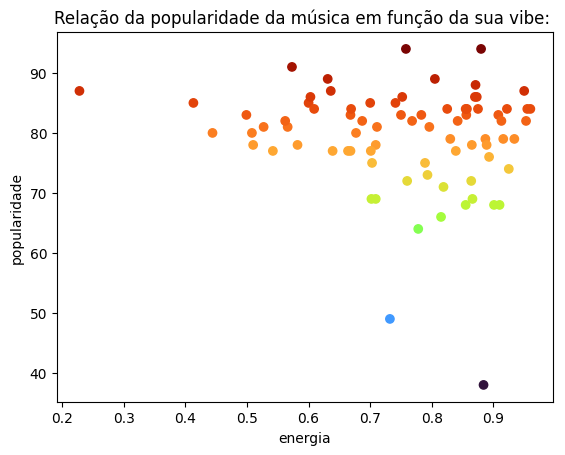

In [ ]:
#Gerando um gráfico de dispersão entre a energia da música e a popularidade

x = dfnd['energia']
y = dfnd['popularidade']
plt.scatter(x, y, c = y, cmap='turbo')

plt.title('Relação da popularidade da música em função da sua vibe: ')
plt.xlabel('energia')
plt.ylabel('popularidade')


In [ ]:
#contando quantas músicas são explicitas:
dfnd.groupby('explicito').size()

explicito
False    59
True     19
dtype: int64

In [ ]:
#Musicas explicitas que são populares

explicitas_populares = dfnd[(dfnd['explicito'] == True) & (dfnd['popularidade'] >= 85)]
num_explicitas_populares = len(explicitas_populares)
print(f'Número de músicas explícitas e populares: {num_explicitas_populares}')


Número de músicas explícitas e populares: 8


In [ ]:
#Musicas não-explicitas que são populares

n_explicitas_populares = dfnd[(dfnd['explicito'] == False) & (dfnd['popularidade'] >= 85)]
num_n_explicitas_populares = len(n_explicitas_populares)
print(f'Número de músicas não-explícitas e populares: {num_n_explicitas_populares}')


Número de músicas não-explícitas e populares: 9


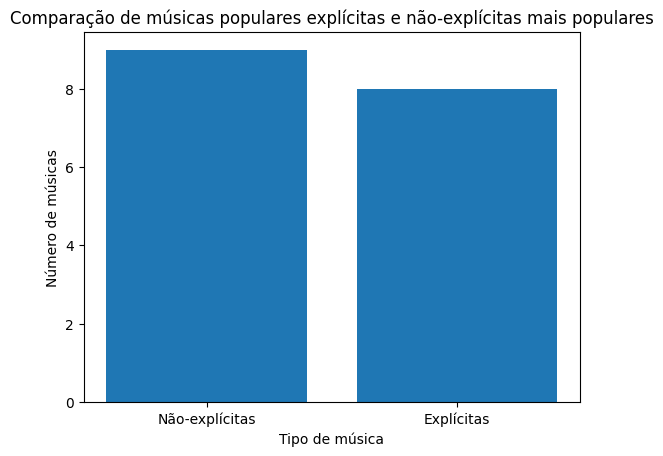

In [ ]:
#Gráfico comparativo das músicas explicitas e não-explicitas

labels = ['Não-explícitas', 'Explícitas']
values = [num_n_explicitas_populares, num_explicitas_populares]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('Comparação de músicas populares explícitas e não-explícitas mais populares')
ax.set_xlabel('Tipo de música')
ax.set_ylabel('Número de músicas')

plt.show()


In [ ]:
#Consuntando o dataframe dfnd, verificamos as músicas e a popularidade de cada

artistas_populares = dfnd.groupby('nome')['popularidade'].mean().sort_values(ascending=False)

print(f'Top 50 musicas com maior popularidade média:\n{artistas_populares.head(50)}')


Top 50 musicas com maior popularidade média:
nome
yes, and?                                                      94.0
BELLAKEO                                                       94.0
DEJA VU                                                        91.0
Me Leva Pra Casa / Escrito Nas Estrelas / Saudade - Ao Vivo    89.0
Let's Go 4                                                     89.0
Barulho Do Foguete - Ao Vivo                                   88.0
POCPOC                                                         87.0
Baile do Bruxo                                                 87.0
Daqui pra Sempre                                               87.0
Lapada Dela - Ao Vivo                                          86.0
Manda um Oi - Ao Vivo                                          86.0
Tenho Que Me Decidir                                           86.0
Maria Mariah                                                   86.0
10 Carros                                                      85.

In [ ]:
#Contando quais artistas mais apareceram na lista dfnd

artistas_mais_frequentes = dfnd['artistas'].value_counts().head(10)
print(f'Top 10 artistas que mais aparecem na lista:\n{artistas_mais_frequentes}')


Top 10 artistas que mais aparecem na lista:
Zé Neto & Cristiano                                     3
Henrique & Juliano                                      2
Ana Castela                                             2
Simone Mendes                                           2
TR, Mc Menor RV, Tropa da W&S                           1
MC Maneirinho, MC Tigrão, Mc Luan, DJ Arana, Karol X    1
Filipe Ret                                              1
Ana Castela, Gustavo Mioto                              1
Gusttavo Lima, Ana Castela                              1
Marshmello, Luísa Sonza                                 1
Name: artistas, dtype: int64
